Importing library


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
df = pd.read_csv(r"C:\Users\VAMSI BANDA\Downloads\train titanic.csv")

In [17]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [19]:
print(df.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [22]:
print(df.duplicated().sum())

0


Data Preprocessing 

In [23]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

Data Visualization

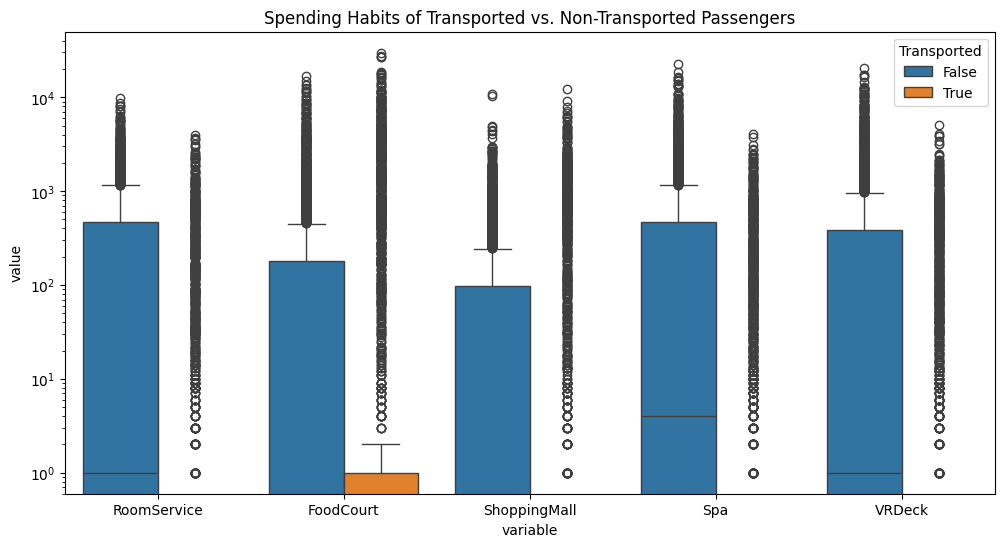

In [24]:
spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
df_melted = df.melt(id_vars=["Transported"], value_vars=spend_cols)

plt.figure(figsize=(12, 6))
sns.boxplot(x="variable", y="value", hue="Transported", data=df_melted)
plt.title("Spending Habits of Transported vs. Non-Transported Passengers")
plt.yscale("log")  # Log scale for better visualization
plt.show()

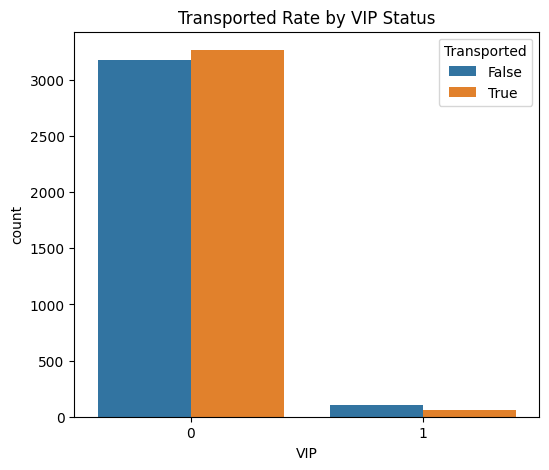

In [25]:
plt.figure(figsize=(6, 5))
sns.countplot(x="VIP", hue="Transported", data=df)
plt.title("Transported Rate by VIP Status")
plt.show()

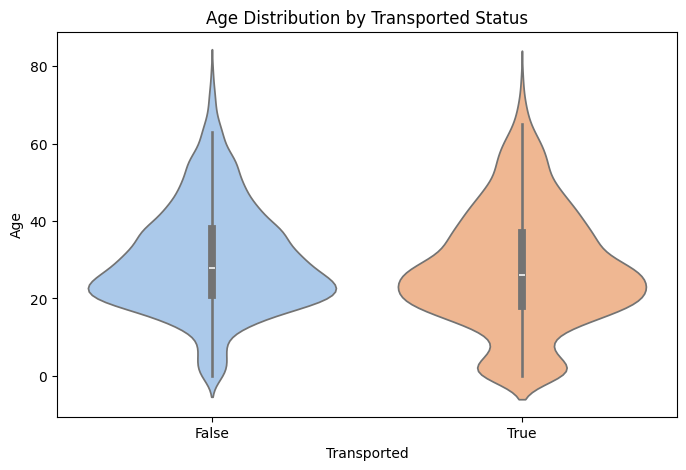

In [26]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Transported", y="Age", data=df, palette="pastel")
plt.title("Age Distribution by Transported Status")
plt.show()

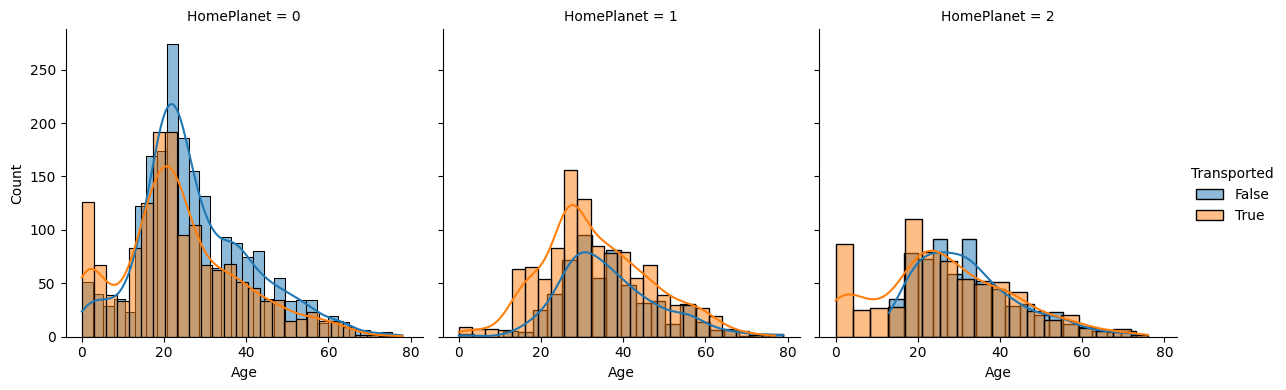

In [27]:
g = sns.FacetGrid(df, col="HomePlanet", hue="Transported", height=4, aspect=1)
g.map(sns.histplot, "Age", kde=True)
g.add_legend()
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
boolean_df = df.select_dtypes(include=['bool']).columns
label_encoders = {}
for col in boolean_df:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

Machine learning and split the data into Train,Test

In [29]:
x = df.drop(['Transported'], axis=1)
y = df['Transported']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Apply Random Forest:

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=42)
rf.fit(X_train, Y_train)

,n_estimators,3
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
rf_pred = rf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, classification_report
acc = accuracy_score(rf_pred, Y_test)
print("Accuracy: ", acc)
print(classification_report(rf_pred, Y_test))

Accuracy:  0.7700453857791225
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       657
           1       0.77      0.77      0.77       665

    accuracy                           0.77      1322
   macro avg       0.77      0.77      0.77      1322
weighted avg       0.77      0.77      0.77      1322



In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Apply XGBOOST:

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=5, max_depth=5)
xgb.fit(X_train, Y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [36]:
xgb_pred = xgb.predict(X_test)

In [37]:
acc_2 = accuracy_score(xgb_pred, Y_test)
print("Accuracy: ", acc_2)

Accuracy:  0.7980332829046899


In [38]:
print(classification_report(xgb_pred, Y_test))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       568
           1       0.86      0.77      0.81       754

    accuracy                           0.80      1322
   macro avg       0.80      0.80      0.80      1322
weighted avg       0.81      0.80      0.80      1322

